In [167]:
import numpy as np
import pandas as pd

In [168]:
from numpy import random
x=[random.randint(0,100) for i in range(50)]
y=[random.randint(0,100) for i in range(50)]

print(x)


[33, 36, 69, 32, 49, 95, 67, 73, 11, 47, 11, 54, 99, 26, 41, 80, 33, 79, 46, 38, 49, 54, 88, 88, 69, 68, 44, 48, 17, 37, 19, 94, 36, 24, 80, 2, 66, 2, 51, 10, 45, 72, 72, 71, 81, 92, 4, 88, 84, 88]


In [169]:
print(y)

[68, 16, 51, 48, 53, 98, 10, 27, 69, 90, 95, 30, 36, 9, 62, 30, 49, 24, 46, 91, 73, 9, 98, 67, 37, 41, 73, 13, 45, 29, 69, 28, 78, 75, 58, 13, 59, 35, 90, 13, 11, 78, 50, 32, 84, 15, 35, 94, 91, 2]


In [170]:
pd.DataFrame(list(zip(x,y)),columns = 'x,y'.split(',')).to_csv('my.csv',index=False)

In [171]:
data = pd.read_csv("my.csv")
data

,x,y
0,33,68
1,36,16
2,69,51
3,32,48
4,49,53
5,95,98
6,67,10
7,73,27
8,11,69
9,47,90


In [172]:
'''import math
np.random.seed(123)

def circulo(num_datos = 100,R = 1, minimo = 0,maximo= 1, center_x = 0 , center_y = 0):
    pi = math.pi
    r = R * np.sqrt(np.random.uniform(minimo, maximo, size = num_datos)) 
    theta = np.random.uniform(minimo, maximo, size= num_datos) * 2 * pi

    x = center_x + np.cos(theta) * r
    y = center_y + np.sin(theta) * r

    x = np.round(x,3)
    y = np.round(y,3)

    df = np.column_stack([x,y])
    df = pd.DataFrame(df)
    df.columns = ['x','y']
    return(df)

# Create data
datos_1 = circulo(num_datos = 20,R = 10, center_x = 5, center_y = 30)
datos_2 = circulo(num_datos = 20,R = 10, center_x = 20, center_y = 10)
datos_3 = circulo(num_datos = 20,R = 10, center_x = 50, center_y = 50)

data = datos_1.append(datos_2).append(datos_3)
data.head()'''

"import math\nnp.random.seed(123)\n\ndef circulo(num_datos = 100,R = 1, minimo = 0,maximo= 1, center_x = 0 , center_y = 0):\n    pi = math.pi\n    r = R * np.sqrt(np.random.uniform(minimo, maximo, size = num_datos)) \n    theta = np.random.uniform(minimo, maximo, size= num_datos) * 2 * pi\n\n    x = center_x + np.cos(theta) * r\n    y = center_y + np.sin(theta) * r\n\n    x = np.round(x,3)\n    y = np.round(y,3)\n\n    df = np.column_stack([x,y])\n    df = pd.DataFrame(df)\n    df.columns = ['x','y']\n    return(df)\n\n# Create data\ndatos_1 = circulo(num_datos = 20,R = 10, center_x = 5, center_y = 30)\ndatos_2 = circulo(num_datos = 20,R = 10, center_x = 20, center_y = 10)\ndatos_3 = circulo(num_datos = 20,R = 10, center_x = 50, center_y = 50)\n\ndata = datos_1.append(datos_2).append(datos_3)\ndata.head()"

In [173]:
'''import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(datos_1['x'], datos_1['y'], c = 'b')
plt.scatter(datos_2['x'], datos_2['y'], c = 'r')
plt.scatter(datos_3['x'], datos_3['y'], c = 'g')
plt.show()'''

"import matplotlib.pyplot as plt\n%matplotlib inline\n\nplt.scatter(datos_1['x'], datos_1['y'], c = 'b')\nplt.scatter(datos_2['x'], datos_2['y'], c = 'r')\nplt.scatter(datos_3['x'], datos_3['y'], c = 'g')\nplt.show()"

In [174]:
def initialize_centroids(k, data):

    n_dims = data.shape[1]
    centroid_min = data.min().min()
    centroid_max = data.max().max()
    centroids = []

    for centroid in range(k):
        centroid = np.random.uniform(centroid_min, centroid_max, n_dims)
        centroids.append(centroid)

    centroids = pd.DataFrame(centroids, columns = data.columns)

    return centroids

centroids = initialize_centroids(3, data)
centroids

,x,y
0,59.100954,27.042244
1,20.073037,98.275296
2,38.616206,17.190809


In [175]:
def calculate_error(a,b):
    '''
    Given two Numpy Arrays, calculates the root of the sum of squared errores.
    '''
    error = np.square(np.sum((a-b)**2))

    return error    

In [176]:
errors = np.array([])
for centroid in range(centroids.shape[0]):
    error = calculate_error(centroids.iloc[centroid, :2], data.iloc[0,:2])
    errors = np.append(errors, error)

errors

array([5563926.06466383, 1174405.44690165, 6828373.62636338])

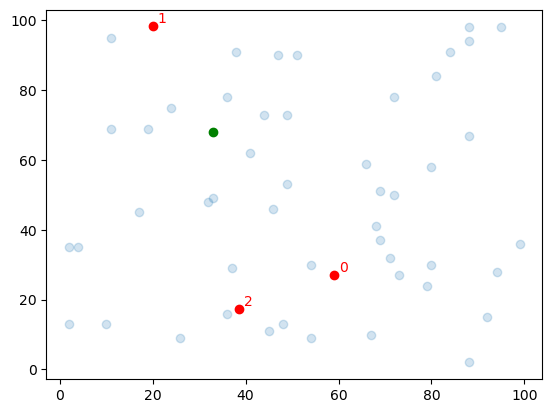

In [177]:
plt.scatter(data.iloc[1:,0], data.iloc[1:,1],  marker = 'o', alpha = 0.2)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  marker = 'o', c = 'r')
plt.scatter(data.iloc[0,0], data.iloc[0,1],  marker = 'o', c = 'g')
for i in range(centroids.shape[0]):
    plt.text(centroids.iloc[i,0]+1, centroids.iloc[i,1]+1, s = centroids.index[i], c = 'r')

In [178]:
np.where(errors == np.amin(errors))[0].tolist()[0]

1

In [179]:
def assign_centroid(data, centroids):
    '''
    Receives a dataframe of data and centroids and returns a list assigning each observation a centroid.
    data: a dataframe with all data that will be used.
    centroids: a dataframe with the centroids. For assignment the index will be used.
    '''

    n_observations = data.shape[0]
    centroid_assign = []
    centroid_errors = []
    k = centroids.shape[0]


    for observation in range(n_observations):

        # Calculate the errror
        errors = np.array([])
        for centroid in range(k):
            error = calculate_error(centroids.iloc[centroid, :2], data.iloc[observation,:2])
            errors = np.append(errors, error)

        # Calculate closest centroid & error 
        closest_centroid =  np.where(errors == np.amin(errors))[0].tolist()[0]
        centroid_error = np.amin(errors)

        # Assign values to lists
        centroid_assign.append(closest_centroid)
        centroid_errors.append(centroid_error)

    return (centroid_assign,centroid_errors)

data['centroid'], data['error'] = assign_centroid(data.iloc[:,:2] ,centroids)
data[['centroid', 'error']].head()



,centroid,error
0,1,1.174405e+06
1,2,6.826985e+01
2,0,4.515372e+05
3,2,9.860102e+05
4,0,6.019190e+05


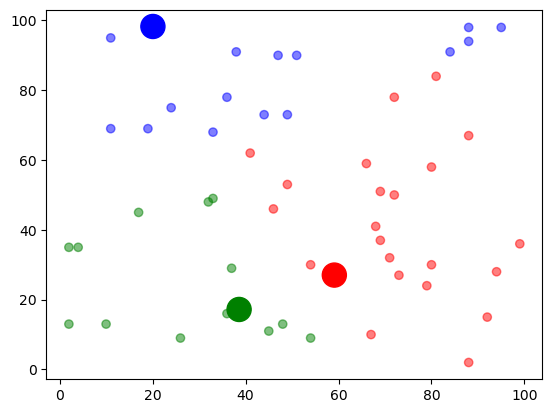

In [180]:
colors = {0:'red', 1:'blue', 2:'green'}

plt.scatter(data.iloc[:,0], data.iloc[:,1],  marker = 'o', c = data['centroid'].apply(lambda x: colors[x]), alpha = 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  marker = 'o', s=300, 
           c = centroids.index.map(lambda x: colors[x]))

In [181]:
data['error'].sum()

155122849.0004954

In [182]:
data_columns = ['x','y']

centroids = data.groupby('centroid').agg('mean').loc[:,data_columns].reset_index(drop = True)
centroids


,x,y
0,72.636364,41.818182
1,47.866667,83.466667
2,26.615385,25.000000


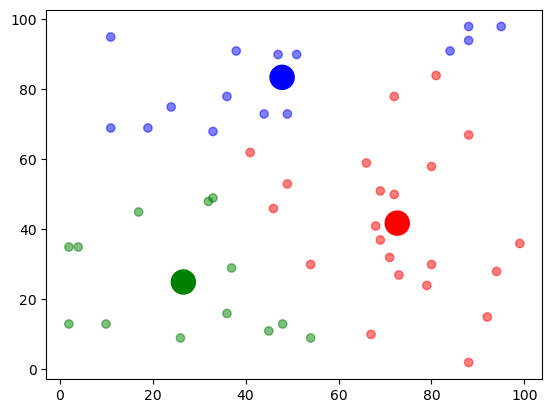

In [183]:
plt.scatter(data.iloc[:,0], data.iloc[:,1],  marker = 'o', c = data['centroid'].apply(lambda x: colors[x]), alpha = 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  marker = 'o', s=300, 
           c = centroids.index.map(lambda x: colors[x]))

In [184]:
def knn(data, k):
    '''
    Given a dataset and number of clusters, it clusterizes the data. 
    data: a DataFrame with all information necessary
    k: number of clusters to create
    '''

    # Initialize centroids and error
    centroids = initialize_centroids(k, data)
    error = []
    compr = True
    i = 0

    while(compr):
        # Obtain centroids and error
        data['centroid'], iter_error = assign_centroid(data,centroids)
        error.append(sum(iter_error))
        # Recalculate centroids
        centroids = data.groupby('centroid').agg('mean').reset_index(drop = True)

        # Check if the error has decreased
        if(len(error)<2):
            compr = True
        else:
            if(round(error[i],3) !=  round(error[i-1],3)):
                compr = True
            else:
                compr = False
        i = i + 1 

    data['centroid'], iter_error = assign_centroid(data,centroids)
    centroids = data.groupby('centroid').agg('mean').reset_index(drop = True)
    return (data['centroid'], iter_error, centroids)

In [185]:
data['centroid'], _, centroids =  knn(data.drop(['centroid','error'], axis = 1),3)
data['centroid'].head()

0    2
1    1
2    0
3    1
4    2
Name: centroid, dtype: int64

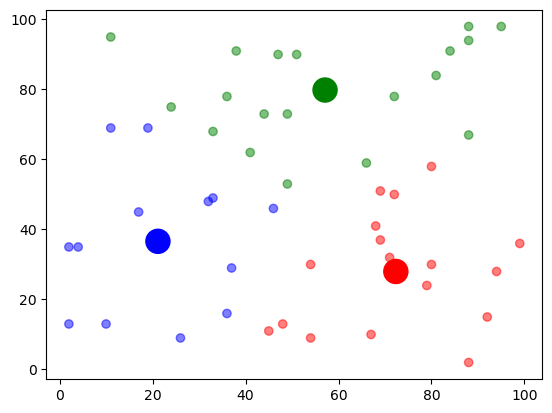

In [186]:
plt.scatter(data.iloc[:,0], data.iloc[:,1],  marker = 'o', c = data['centroid'].apply(lambda x: colors[x]), alpha = 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  marker = 'o', s=300, 
           c = centroids.index.map(lambda x: colors[x]))


In [187]:
num_trials = 10

classifications = []
errors = []
centroids = []

for i in range(num_trials):

    np.random.seed(i)

    iter_class, iter_error, iter_centroid = knn(data.drop(['centroid','error'], axis = 1),4)

    classifications.append(iter_class)
    errors.append(sum(iter_error))
    centroids.append(iter_centroid)

errors

[11748935.672534456,
 24182521.668362882,
 10652575.21982442,
 11596132.094134971,
 23743620.82913487,
 37459208.42737008,
 28348304.267102353,
 11182285.37190289,
 11596132.094134971,
 11070037.072074028]

In [188]:
## Usi